In [275]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [276]:
#emotion_labelデータの読みこみ

# data1_b_label_50 = pd.read_csv('emotion_label/B/emotion_B_20201111_1_50.csv')
# data1_b_label_60 = pd.read_csv('emotion_label/B/emotion_B_20201111_1_60.csv')
# data1_b_label_70 = pd.read_csv('emotion_label/B/emotion_B_20201111_1_70.csv')
# data1_b_label_80 = pd.read_csv('emotion_label/B/emotion_B_20201111_1_80.csv')

# data2_b_label_50 = pd.read_csv('emotion_label/session2/B/emotion_B_20201111_2_50.csv')
# data2_b_label_60 = pd.read_csv('emotion_label/session2/B/emotion_B_20201111_2_60.csv')
# data2_b_label_70 = pd.read_csv('emotion_label/session2/B/emotion_B_20201111_2_70.csv')
data2_b_label_80 = pd.read_csv('emotion_label/session2/B/emotion_B_20201111_2_80.csv')

#feature_data(特徴量データーセット)の読みこみ
# data1_b_record_all_feature_50 = pd.read_csv('feature/B/data1_b_50_record_all_feature.csv')
# data1_b_record_all_feature_60 = pd.read_csv('feature/B/data1_b_60_record_all_feature.csv')
# data1_b_record_all_feature_70 = pd.read_csv('feature/B/data1_b_70_record_all_feature.csv')
# data1_b_record_all_feature_80 = pd.read_csv('feature/B/data1_b_80_record_all_feature.csv')

# data2_b_record_all_feature_50 = pd.read_csv('feature/B/data2_b_50_record_all_feature.csv')
# data2_b_record_all_feature_60 = pd.read_csv('feature/B/data2_b_60_record_all_feature.csv')
# data2_b_record_all_feature_70 = pd.read_csv('feature/B/data2_b_70_record_all_feature.csv')
data2_b_record_all_feature_80 = pd.read_csv('feature/B/data2_b_80_record_all_feature.csv')

# feature_emg = pd.read_csv("feature_emg.csv")

#確認
display(data2_b_record_all_feature_80)
display(data2_b_label_80)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 15:15:30,2020-11-11 15:15:34,10254.309,463.512,-408.743,57.637,40.933,7.499,22558.381519,25334.803856,...,9744,-20,-1757,-1483,-2602,-676,17.612524,72.103750,0.391389,279.207213
1,2020-11-11 15:15:31,2020-11-11 15:15:35,10259.147,439.837,-339.496,41.988,112.338,-11.007,25821.535391,28963.370431,...,9744,-20,-1757,-1483,-2602,-676,17.612524,51.250395,0.391389,305.524595
2,2020-11-11 15:15:32,2020-11-11 15:15:36,10263.035,450.146,-297.635,23.730,47.741,17.277,26485.223775,29802.692684,...,9768,-20,-1540,-1483,-2602,-676,4.305284,67.363613,0.391389,235.966549
3,2020-11-11 15:15:33,2020-11-11 15:15:37,10264.900,452.556,-228.331,51.165,74.870,-3.487,25215.186000,25088.510864,...,9768,-20,-1540,-1324,-1108,-676,4.305284,82.347653,0.782779,190.595427
4,2020-11-11 15:15:34,2020-11-11 15:15:38,10264.243,464.621,-139.944,59.252,89.329,11.331,23955.353951,21768.005359,...,9768,-20,-1540,-1337,-1108,-542,4.696673,108.156118,0.391389,183.293205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2020-11-11 15:29:53,2020-11-11 15:29:57,10271.765,86.960,-324.980,43.918,50.582,3.240,181459.649775,41769.212400,...,8284,-886,-5268,-3178,-8401,-896,4.305284,259.823134,0.391389,1108.439812
663,2020-11-11 15:29:54,2020-11-11 15:29:58,10265.554,132.897,-363.220,75.171,13.111,-55.361,146349.167084,53108.656391,...,8284,-886,-5268,-3178,-8401,-896,3.913894,339.025962,0.782779,924.894671
664,2020-11-11 15:29:55,2020-11-11 15:29:59,10267.061,191.674,-404.383,67.725,-72.842,-26.213,91678.371279,44079.669724,...,9273,-389,-1777,-3013,-4602,-835,3.913894,252.719272,3.131115,510.351958
665,2020-11-11 15:29:56,2020-11-11 15:30:00,10263.345,225.737,-501.085,10.583,27.736,-1.288,67391.975975,39316.481831,...,9380,-355,-1674,-1831,-3041,-640,3.522505,192.303019,0.391389,294.046428


,start_time,finish_time,emotion_level
0,3:46,3:50,4
1,3:47,3:51,4
2,3:48,3:52,4
3,3:49,3:53,4
4,3:50,3:54,4
...,...,...,...
662,18:09,18:13,3
663,18:10,18:14,3
664,18:11,18:15,3
665,18:12,18:16,3


In [277]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

# data1_b_label_50 = dropna(data1_b_label_50)
# data1_b_label_60 = dropna(data1_b_label_60)
# data1_b_label_70 = dropna(data1_b_label_70)
# data1_b_label_80 = dropna(data1_b_label_80)

# data2_b_label_50 = dropna(data2_b_label_50)
# data2_b_label_60 = dropna(data2_b_label_60)
# data2_b_label_70 = dropna(data2_b_label_70)
data2_b_label_80 = dropna(data2_b_label_80)

In [278]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

# data1_b_label_50 = dropna(data1_b_label_50)
# data1_b_label_60 = dropna(data1_b_label_60)
# data1_b_label_70 = dropna(data1_b_label_70)
# data1_b_label_80 = dropna(data1_b_label_80)

# data2_b_label_50 = dropna(data2_b_label_50)
# data2_b_label_60 = dropna(data2_b_label_60)
# data2_b_label_70 = dropna(data2_b_label_70)
data2_b_label_80 = dropna(data2_b_label_80)

In [279]:
#emotion_labelデータからtimeHMSとsubject列を消去

# data1_b_label_50 = data1_b_label_50.drop(["start_time", "finish_time"], axis=1)
# data1_b_label_60 = data1_b_label_60.drop(["start_time", "finish_time"], axis=1)
# data1_b_label_70 = data1_b_label_70.drop(["start_time", "finish_time"], axis=1)
# data1_b_label_80 = data1_b_label_80.drop(["start_time", "finish_time"], axis=1)

# data2_b_label_50 = data2_b_label_50.drop(["start_time", "finish_time"], axis=1)
# data2_b_label_60 = data2_b_label_60.drop(["start_time", "finish_time"], axis=1)
# data2_b_label_70 = data2_b_label_70.drop(["start_time", "finish_time"], axis=1)
data2_b_label_80 = data2_b_label_80.drop(["start_time", "finish_time"], axis=1)

#確認
data2_b_label_80

,emotion_level
0,4
1,4
2,4
3,4
4,4
...,...
662,3
663,3
664,3
665,3


In [280]:
#feature_dataとemotion_labelデータを連結
# data1_b_record_all_feature_50 = pd.concat([data1_b_record_all_feature_50, data1_b_label_50], axis=1, ignore_index=False)
# data1_b_record_all_feature_60 = pd.concat([data1_b_record_all_feature_60, data1_b_label_60], axis=1, ignore_index=False)
# data1_b_record_all_feature_70 = pd.concat([data1_b_record_all_feature_70, data1_b_label_70], axis=1, ignore_index=False)
# data1_b_record_all_feature_80 = pd.concat([data1_b_record_all_feature_80, data1_b_label_80], axis=1, ignore_index=False)

# data2_b_record_all_feature_50 = pd.concat([data2_b_record_all_feature_50, data2_b_label_50], axis=1, ignore_index=False)
# data2_b_record_all_feature_60 = pd.concat([data2_b_record_all_feature_60, data2_b_label_60], axis=1, ignore_index=False)
# data2_b_record_all_feature_70 = pd.concat([data2_b_record_all_feature_70, data2_b_label_70], axis=1, ignore_index=False)
data2_b_record_all_feature_80 = pd.concat([data2_b_record_all_feature_80, data2_b_label_80], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のAさんのデータを表示している)
display(data2_b_record_all_feature_80)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 15:15:30,2020-11-11 15:15:34,10254.309,463.512,-408.743,57.637,40.933,7.499,22558.381519,25334.803856,...,-20,-1757,-1483,-2602,-676,17.612524,72.103750,0.391389,279.207213,4
1,2020-11-11 15:15:31,2020-11-11 15:15:35,10259.147,439.837,-339.496,41.988,112.338,-11.007,25821.535391,28963.370431,...,-20,-1757,-1483,-2602,-676,17.612524,51.250395,0.391389,305.524595,4
2,2020-11-11 15:15:32,2020-11-11 15:15:36,10263.035,450.146,-297.635,23.730,47.741,17.277,26485.223775,29802.692684,...,-20,-1540,-1483,-2602,-676,4.305284,67.363613,0.391389,235.966549,4
3,2020-11-11 15:15:33,2020-11-11 15:15:37,10264.900,452.556,-228.331,51.165,74.870,-3.487,25215.186000,25088.510864,...,-20,-1540,-1324,-1108,-676,4.305284,82.347653,0.782779,190.595427,4
4,2020-11-11 15:15:34,2020-11-11 15:15:38,10264.243,464.621,-139.944,59.252,89.329,11.331,23955.353951,21768.005359,...,-20,-1540,-1337,-1108,-542,4.696673,108.156118,0.391389,183.293205,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2020-11-11 15:29:53,2020-11-11 15:29:57,10271.765,86.960,-324.980,43.918,50.582,3.240,181459.649775,41769.212400,...,-886,-5268,-3178,-8401,-896,4.305284,259.823134,0.391389,1108.439812,3
663,2020-11-11 15:29:54,2020-11-11 15:29:58,10265.554,132.897,-363.220,75.171,13.111,-55.361,146349.167084,53108.656391,...,-886,-5268,-3178,-8401,-896,3.913894,339.025962,0.782779,924.894671,3
664,2020-11-11 15:29:55,2020-11-11 15:29:59,10267.061,191.674,-404.383,67.725,-72.842,-26.213,91678.371279,44079.669724,...,-389,-1777,-3013,-4602,-835,3.913894,252.719272,3.131115,510.351958,3
665,2020-11-11 15:29:56,2020-11-11 15:30:00,10263.345,225.737,-501.085,10.583,27.736,-1.288,67391.975975,39316.481831,...,-355,-1674,-1831,-3041,-640,3.522505,192.303019,0.391389,294.046428,3


In [281]:
data2_b_record_all_feature_80

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 15:15:30,2020-11-11 15:15:34,10254.309,463.512,-408.743,57.637,40.933,7.499,22558.381519,25334.803856,...,-20,-1757,-1483,-2602,-676,17.612524,72.103750,0.391389,279.207213,4
1,2020-11-11 15:15:31,2020-11-11 15:15:35,10259.147,439.837,-339.496,41.988,112.338,-11.007,25821.535391,28963.370431,...,-20,-1757,-1483,-2602,-676,17.612524,51.250395,0.391389,305.524595,4
2,2020-11-11 15:15:32,2020-11-11 15:15:36,10263.035,450.146,-297.635,23.730,47.741,17.277,26485.223775,29802.692684,...,-20,-1540,-1483,-2602,-676,4.305284,67.363613,0.391389,235.966549,4
3,2020-11-11 15:15:33,2020-11-11 15:15:37,10264.900,452.556,-228.331,51.165,74.870,-3.487,25215.186000,25088.510864,...,-20,-1540,-1324,-1108,-676,4.305284,82.347653,0.782779,190.595427,4
4,2020-11-11 15:15:34,2020-11-11 15:15:38,10264.243,464.621,-139.944,59.252,89.329,11.331,23955.353951,21768.005359,...,-20,-1540,-1337,-1108,-542,4.696673,108.156118,0.391389,183.293205,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2020-11-11 15:29:53,2020-11-11 15:29:57,10271.765,86.960,-324.980,43.918,50.582,3.240,181459.649775,41769.212400,...,-886,-5268,-3178,-8401,-896,4.305284,259.823134,0.391389,1108.439812,3
663,2020-11-11 15:29:54,2020-11-11 15:29:58,10265.554,132.897,-363.220,75.171,13.111,-55.361,146349.167084,53108.656391,...,-886,-5268,-3178,-8401,-896,3.913894,339.025962,0.782779,924.894671,3
664,2020-11-11 15:29:55,2020-11-11 15:29:59,10267.061,191.674,-404.383,67.725,-72.842,-26.213,91678.371279,44079.669724,...,-389,-1777,-3013,-4602,-835,3.913894,252.719272,3.131115,510.351958,3
665,2020-11-11 15:29:56,2020-11-11 15:30:00,10263.345,225.737,-501.085,10.583,27.736,-1.288,67391.975975,39316.481831,...,-355,-1674,-1831,-3041,-640,3.522505,192.303019,0.391389,294.046428,3


In [282]:
len(data2_b_record_all_feature_80)

667

In [283]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している
# data1_a_50_record_all_feature_1 = data1_a_record_all_feature_50.iloc[0:38]
# data1_a_50_record_all_feature_2 = data1_a_record_all_feature_50.iloc[38:471]
# data1_a_50_record_all_feature_3 = data1_a_record_all_feature_50.iloc[471:687]

# data1_a_60_record_all_feature_1 = data1_a_record_all_feature_60.iloc[0:38]
# data1_a_60_record_all_feature_2 = data1_a_record_all_feature_60.iloc[38:471]
# data1_a_60_record_all_feature_3 = data1_a_record_all_feature_60.iloc[471:687]

# data1_a_70_record_all_feature_1 = data1_a_record_all_feature_70.iloc[0:38]
# data1_a_70_record_all_feature_2 = data1_a_record_all_feature_70.iloc[38:471]
# data1_a_70_record_all_feature_3 = data1_a_record_all_feature_70.iloc[471:687]

# data1_a_80_record_all_feature_1 = data1_a_record_all_feature_80.iloc[0:38]
# data1_a_80_record_all_feature_2 = data1_a_record_all_feature_80.iloc[38:471]
# data1_a_80_record_all_feature_3 = data1_a_record_all_feature_80.iloc[471:687]


# data2_b_50_record_all_feature_1 = data2_b_record_all_feature_50.iloc[0:238]
# data2_b_50_record_all_feature_2 = data2_b_record_all_feature_50.iloc[238:476]
# data2_b_50_record_all_feature_3 = data2_b_record_all_feature_50.iloc[476:715]

# data2_b_60_record_all_feature_1 = data2_b_record_all_feature_60.iloc[0:234]
# data2_b_60_record_all_feature_2 = data2_b_record_all_feature_60.iloc[234:468]
# data2_b_60_record_all_feature_3 = data2_b_record_all_feature_60.iloc[468:701]

# data2_b_70_record_all_feature_1 = data2_b_record_all_feature_70.iloc[0:230]
# data2_b_70_record_all_feature_2 = data2_b_record_all_feature_70.iloc[230:460]
# data2_b_70_record_all_feature_3 = data2_b_record_all_feature_70.iloc[460:688]

data2_b_80_record_all_feature_1 = data2_b_record_all_feature_80.iloc[0:222]
data2_b_80_record_all_feature_2 = data2_b_record_all_feature_80.iloc[222:444]
data2_b_80_record_all_feature_3 = data2_b_record_all_feature_80.iloc[444:667]

In [284]:
# data2_a_50_record_all_feature_1 = data2_a_record_all_feature_50.iloc[0:38]
# data2_a_50_record_all_feature_2 = data2_a_record_all_feature_50.iloc[38:687]
# data2_a_50_record_all_feature_3 = data2_a_record_all_feature_50.iloc[471:687]

# data2_a_60_record_all_feature_1 = data2_a_record_all_feature_60.iloc[0:38]
# data2_a_60_record_all_feature_2 = data2_a_record_all_feature_60.iloc[38:687]
# data2_a_60_record_all_feature_3 = data2_a_record_all_feature_60.iloc[471:687]

# data2_a_70_record_all_feature_1 = data2_a_record_all_feature_70.iloc[0:38]
# data2_a_70_record_all_feature_2 = data2_a_record_all_feature_70.iloc[38:687]
# data2_a_70_record_all_feature_3 = data2_a_record_all_feature_70.iloc[471:687]

# data2_a_80_record_all_feature_1 = data2_a_record_all_feature_80.iloc[0:38]
# data2_a_80_record_all_feature_2 = data2_a_record_all_feature_80.iloc[38:687]
# data2_a_80_record_all_feature_3 = data2_a_record_all_feature_80.iloc[471:687]

In [285]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

# data1_a_50_record_all_feature_1 = emotion_level_define(data1_a_50_record_all_feature_1)
# data1_a_50_record_all_feature_2 = emotion_level_define(data1_a_50_record_all_feature_2)
# data1_a_50_record_all_feature_3 = emotion_level_define(data1_a_50_record_all_feature_3)

# data1_a_60_record_all_feature_1 = emotion_level_define(data1_a_60_record_all_feature_1)
# data1_a_60_record_all_feature_2 = emotion_level_define(data1_a_60_record_all_feature_2)
# data1_a_60_record_all_feature_3 = emotion_level_define(data1_a_60_record_all_feature_3)

# data1_a_70_record_all_feature_1 = emotion_level_define(data1_a_70_record_all_feature_1)
# data1_a_70_record_all_feature_2 = emotion_level_define(data1_a_70_record_all_feature_2)
# data1_a_70_record_all_feature_3 = emotion_level_define(data1_a_70_record_all_feature_3)

# data1_a_80_record_all_feature_1 = emotion_level_define(data1_a_80_record_all_feature_1)
# data1_a_80_record_all_feature_2 = emotion_level_define(data1_a_80_record_all_feature_2)
# data1_a_80_record_all_feature_3 = emotion_level_define(data1_a_80_record_all_feature_3)

# data2_b_50_record_all_feature_1 = emotion_level_define(data2_b_50_record_all_feature_1)
# data2_b_50_record_all_feature_2 = emotion_level_define(data2_b_50_record_all_feature_2)
# data2_b_50_record_all_feature_3 = emotion_level_define(data2_b_50_record_all_feature_3)

# data2_b_60_record_all_feature_1 = emotion_level_define(data2_b_60_record_all_feature_1)
# data2_b_60_record_all_feature_2 = emotion_level_define(data2_b_60_record_all_feature_2)
# data2_b_60_record_all_feature_3 = emotion_level_define(data2_b_60_record_all_feature_3)

# data2_b_70_record_all_feature_1 = emotion_level_define(data2_b_70_record_all_feature_1)
# data2_b_70_record_all_feature_2 = emotion_level_define(data2_b_70_record_all_feature_2)
# data2_b_70_record_all_feature_3 = emotion_level_define(data2_b_70_record_all_feature_3)

data2_b_80_record_all_feature_1 = emotion_level_define(data2_b_80_record_all_feature_1)
data2_b_80_record_all_feature_2 = emotion_level_define(data2_b_80_record_all_feature_2)
data2_b_80_record_all_feature_3 = emotion_level_define(data2_b_80_record_all_feature_3)

C:\Users\shish\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\shish\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [286]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


# data1_a_50_record_all_feature_1 = emotion_level_drop(data1_a_50_record_all_feature_1)
# data1_a_50_record_all_feature_2 = emotion_level_drop(data1_a_50_record_all_feature_2)
# data1_a_50_record_all_feature_3 = emotion_level_drop(data1_a_50_record_all_feature_3)

# data1_a_60_record_all_feature_1 = emotion_level_drop(data1_a_60_record_all_feature_1)
# data1_a_60_record_all_feature_2 = emotion_level_drop(data1_a_60_record_all_feature_2)
# data1_a_60_record_all_feature_3 = emotion_level_drop(data1_a_60_record_all_feature_3)

# data1_a_70_record_all_feature_1 = emotion_level_drop(data1_a_70_record_all_feature_1)
# data1_a_70_record_all_feature_2 = emotion_level_drop(data1_a_70_record_all_feature_2)
# data1_a_70_record_all_feature_3 = emotion_level_drop(data1_a_70_record_all_feature_3)

# data1_a_80_record_all_feature_1 = emotion_level_drop(data1_a_80_record_all_feature_1)
# data1_a_80_record_all_feature_2 = emotion_level_drop(data1_a_80_record_all_feature_2)
# data1_a_80_record_all_feature_3 = emotion_level_drop(data1_a_80_record_all_feature_3)

# data2_b_50_record_all_feature_1 = emotion_level_drop(data2_b_50_record_all_feature_1)
# data2_b_50_record_all_feature_2 = emotion_level_drop(data2_b_50_record_all_feature_2)
# data2_b_50_record_all_feature_3 = emotion_level_drop(data2_b_50_record_all_feature_3)

# data2_b_60_record_all_feature_1 = emotion_level_drop(data2_b_60_record_all_feature_1)
# data2_b_60_record_all_feature_2 = emotion_level_drop(data2_b_60_record_all_feature_2)
# data2_b_60_record_all_feature_3 = emotion_level_drop(data2_b_60_record_all_feature_3)

# data2_b_70_record_all_feature_1 = emotion_level_drop(data2_b_70_record_all_feature_1)
# data2_b_70_record_all_feature_2 = emotion_level_drop(data2_b_70_record_all_feature_2)
# data2_b_70_record_all_feature_3 = emotion_level_drop(data2_b_70_record_all_feature_3)

data2_b_80_record_all_feature_1 = emotion_level_drop(data2_b_80_record_all_feature_1)
data2_b_80_record_all_feature_2 = emotion_level_drop(data2_b_80_record_all_feature_2)
data2_b_80_record_all_feature_3 = emotion_level_drop(data2_b_80_record_all_feature_3)

C:\Users\shish\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [287]:
data2_b_80_record_all_feature_3

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
444,2020-11-11 15:25:29,2020-11-11 15:25:33,10227.190,271.415,-946.227,71.198,124.399,-7.521,37480.989900,11081.784775,...,-42,-3229,-1093,-2102,-481,3.913894,155.235302,0.391389,341.377877,positive
445,2020-11-11 15:25:30,2020-11-11 15:25:34,10227.418,256.052,-896.506,61.341,43.895,13.024,25050.397276,7616.239296,...,-42,-1935,-910,-1901,-481,2.348337,92.518627,0.391389,174.914128,positive
446,2020-11-11 15:25:31,2020-11-11 15:25:35,10226.300,238.519,-890.393,54.990,85.770,-3.526,23366.668000,6322.395639,...,-42,-1935,-910,-1901,-481,3.131115,64.748469,0.391389,156.865911,positive
447,2020-11-11 15:25:32,2020-11-11 15:25:36,10228.895,239.693,-867.691,38.517,45.888,11.287,27164.291975,12100.952751,...,-308,-2570,-1434,-4193,-780,1.956947,50.233836,0.391389,278.199678,positive
448,2020-11-11 15:25:33,2020-11-11 15:25:37,10230.868,246.311,-826.286,51.318,61.171,5.555,29674.996576,13141.548279,...,-308,-2570,-1434,-4193,-780,2.348337,74.661318,0.391389,279.436821,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2020-11-11 15:29:53,2020-11-11 15:29:57,10271.765,86.960,-324.980,43.918,50.582,3.240,181459.649775,41769.212400,...,-886,-5268,-3178,-8401,-896,4.305284,259.823134,0.391389,1108.439812,positive
663,2020-11-11 15:29:54,2020-11-11 15:29:58,10265.554,132.897,-363.220,75.171,13.111,-55.361,146349.167084,53108.656391,...,-886,-5268,-3178,-8401,-896,3.913894,339.025962,0.782779,924.894671,positive
664,2020-11-11 15:29:55,2020-11-11 15:29:59,10267.061,191.674,-404.383,67.725,-72.842,-26.213,91678.371279,44079.669724,...,-389,-1777,-3013,-4602,-835,3.913894,252.719272,3.131115,510.351958,positive
665,2020-11-11 15:29:56,2020-11-11 15:30:00,10263.345,225.737,-501.085,10.583,27.736,-1.288,67391.975975,39316.481831,...,-355,-1674,-1831,-3041,-640,3.522505,192.303019,0.391389,294.046428,positive


In [288]:
#全データからpositiveの数を確認
# data1_a_50_record_all_feature_positive_1 = data1_a_50_record_all_feature_1[data1_a_50_record_all_feature_1.label == "positive"]
# data1_a_50_record_all_feature_positive_1 = data1_a_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_positive_1))

# data1_a_50_record_all_feature_positive_2 = data1_a_50_record_all_feature_2[data1_a_50_record_all_feature_2.label == "positive"]
# data1_a_50_record_all_feature_positive_2 = data1_a_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_positive_2))

# data1_a_50_record_all_feature_positive_3 = data1_a_50_record_all_feature_3[data1_a_50_record_all_feature_3.label == "positive"]
# data1_a_50_record_all_feature_positive_3 = data1_a_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_positive_3))

# data1_a_60_record_all_feature_positive_1 = data1_a_60_record_all_feature_1[data1_a_60_record_all_feature_1.label == "positive"]
# data1_a_60_record_all_feature_positive_1 = data1_a_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_positive_1))

# data1_a_60_record_all_feature_positive_2 = data1_a_60_record_all_feature_2[data1_a_60_record_all_feature_2.label == "positive"]
# data1_a_60_record_all_feature_positive_2 = data1_a_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_positive_2))

# data1_a_60_record_all_feature_positive_3 = data1_a_60_record_all_feature_3[data1_a_60_record_all_feature_3.label == "positive"]
# data1_a_60_record_all_feature_positive_3 = data1_a_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_positive_3))

# data1_a_70_record_all_feature_positive_1 = data1_a_70_record_all_feature_1[data1_a_70_record_all_feature_1.label == "positive"]
# data1_a_670_record_all_feature_positive_1 = data1_a_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_positive_1))

# data1_a_70_record_all_feature_positive_2 = data1_a_70_record_all_feature_2[data1_a_70_record_all_feature_2.label == "positive"]
# data1_a_70_record_all_feature_positive_2 = data1_a_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_positive_2))

# data1_a_70_record_all_feature_positive_3 = data1_a_70_record_all_feature_3[data1_a_70_record_all_feature_3.label == "positive"]
# data1_a_70_record_all_feature_positive_3 = data1_a_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_positive_3))

# data1_a_80_record_all_feature_positive_1 = data1_a_80_record_all_feature_1[data1_a_80_record_all_feature_1.label == "positive"]
# data1_a_80_record_all_feature_positive_1 = data1_a_80_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_positive_1))

# data1_a_80_record_all_feature_positive_2 = data1_a_80_record_all_feature_2[data1_a_80_record_all_feature_2.label == "positive"]
# data1_a_80_record_all_feature_positive_2 = data1_a_80_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_positive_2))

# data1_a_80_record_all_feature_positive_3 = data1_a_80_record_all_feature_3[data1_a_80_record_all_feature_3.label == "positive"]
# data1_a_80_record_all_feature_positive_3 = data1_a_80_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_positive_3))

In [289]:
# data2_b_50_record_all_feature_positive_1 = data2_b_50_record_all_feature_1[data2_b_50_record_all_feature_1.label == "positive"]
# data2_b_50_record_all_feature_positive_1 = data2_b_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_b_50_record_all_feature_positive_1))

# data2_b_50_record_all_feature_positive_2 = data2_b_50_record_all_feature_2[data2_b_50_record_all_feature_2.label == "positive"]
# data2_b_50_record_all_feature_positive_2 = data2_b_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_b_50_record_all_feature_positive_2))

# data2_b_50_record_all_feature_positive_3 = data2_b_50_record_all_feature_3[data2_b_50_record_all_feature_3.label == "positive"]
# data2_b_50_record_all_feature_positive_3 = data2_b_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_b_50_record_all_feature_positive_3))

# data2_b_60_record_all_feature_positive_1 = data2_b_60_record_all_feature_1[data2_b_60_record_all_feature_1.label == "positive"]
# data2_b_60_record_all_feature_positive_1 = data2_b_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_b_60_record_all_feature_positive_1))

# data2_b_60_record_all_feature_positive_2 = data2_b_60_record_all_feature_2[data2_b_60_record_all_feature_2.label == "positive"]
# data2_b_60_record_all_feature_positive_2 = data2_b_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_b_60_record_all_feature_positive_2))

# data2_b_60_record_all_feature_positive_3 = data2_b_60_record_all_feature_3[data2_b_60_record_all_feature_3.label == "positive"]
# data2_b_60_record_all_feature_positive_3 = data2_b_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_b_60_record_all_feature_positive_3))

# data2_b_70_record_all_feature_positive_1 = data2_b_70_record_all_feature_1[data2_b_70_record_all_feature_1.label == "positive"]
# data2_b_70_record_all_feature_positive_1 = data2_b_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_b_70_record_all_feature_positive_1))

# data2_b_70_record_all_feature_positive_2 = data2_b_70_record_all_feature_2[data2_b_70_record_all_feature_2.label == "positive"]
# data2_b_70_record_all_feature_positive_2 = data2_b_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_b_70_record_all_feature_positive_2))

# data2_b_70_record_all_feature_positive_3 = data2_b_70_record_all_feature_3[data2_b_70_record_all_feature_3.label == "positive"]
# data2_b_70_record_all_feature_positive_3 = data2_b_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_b_70_record_all_feature_positive_3))

data2_b_80_record_all_feature_positive_1 = data2_b_80_record_all_feature_1[data2_b_80_record_all_feature_1.label == "positive"]
data2_b_80_record_all_feature_positive_1 = data2_b_80_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_b_80_record_all_feature_positive_1))

data2_b_80_record_all_feature_positive_2 = data2_b_80_record_all_feature_2[data2_b_80_record_all_feature_2.label == "positive"]
data2_b_80_record_all_feature_positive_2 = data2_b_80_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_b_80_record_all_feature_positive_2))

data2_b_80_record_all_feature_positive_3 = data2_b_80_record_all_feature_3[data2_b_80_record_all_feature_3.label == "positive"]
data2_b_80_record_all_feature_positive_3 = data2_b_80_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_b_80_record_all_feature_positive_3))

111
132
223


In [290]:
# #全データからotherの数を確認
# data1_a_50_record_all_feature_other_1 = data1_a_50_record_all_feature_1[data1_a_50_record_all_feature_1.label == "other"]
# data1_a_50_record_all_feature_other_1 = data1_a_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_other_1))

# data1_a_50_record_all_feature_other_2 = data1_a_50_record_all_feature_2[data1_a_50_record_all_feature_2.label == "other"]
# data1_a_50_record_all_feature_other_2 = data1_a_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_other_2))

# data1_a_50_record_all_feature_other_3 = data1_a_50_record_all_feature_3[data1_a_50_record_all_feature_3.label == "other"]
# data1_a_50_record_all_feature_other_3 = data1_a_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_other_3))

# data1_a_60_record_all_feature_other_2 = data1_a_60_record_all_feature_2[data1_a_60_record_all_feature_2.label == "other"]
# data1_a_60_record_all_feature_other_2 = data1_a_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_other_2))

# data1_a_60_record_all_feature_other_3 = data1_a_60_record_all_feature_3[data1_a_60_record_all_feature_3.label == "other"]
# data1_a_60_record_all_feature_other_3 = data1_a_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_other_3))

# data1_a_60_record_all_feature_other_1 = data1_a_60_record_all_feature_1[data1_a_60_record_all_feature_1.label == "other"]
# data1_a_60_record_all_feature_other_1 = data1_a_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_other_1))

# data1_a_70_record_all_feature_other_2 = data1_a_70_record_all_feature_2[data1_a_70_record_all_feature_2.label == "other"]
# data1_a_70_record_all_feature_other_2 = data1_a_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_other_2))

# data1_a_70_record_all_feature_other_3 = data1_a_70_record_all_feature_3[data1_a_70_record_all_feature_3.label == "other"]
# data1_a_70_record_all_feature_other_3 = data1_a_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_other_3))

# data1_a_70_record_all_feature_other_1 = data1_a_70_record_all_feature_1[data1_a_70_record_all_feature_1.label == "other"]
# data1_a_70_record_all_feature_other_1 = data1_a_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_other_1))

# data1_a_80_record_all_feature_other_2 = data1_a_80_record_all_feature_2[data1_a_80_record_all_feature_2.label == "other"]
# data1_a_80_record_all_feature_other_2 = data1_a_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_other_2))

# data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_3[data1_a_80_record_all_feature_3.label == "other"]
# data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_other_3))

# data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_3[data1_a_80_record_all_feature_3.label == "other"]
# data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_other_3))

In [291]:
# data2_b_50_record_all_feature_other_1 = data2_b_50_record_all_feature_1[data2_b_50_record_all_feature_1.label == "other"]
# data2_b_50_record_all_feature_other_1 = data2_b_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_b_50_record_all_feature_other_1))

# data2_b_50_record_all_feature_other_2 = data2_b_50_record_all_feature_2[data2_b_50_record_all_feature_2.label == "other"]
# data2_b_50_record_all_feature_other_2 = data2_b_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_b_50_record_all_feature_other_2))

# data2_b_50_record_all_feature_other_3 = data2_b_50_record_all_feature_3[data2_b_50_record_all_feature_3.label == "other"]
# data2_b_50_record_all_feature_other_3 = data2_b_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_b_50_record_all_feature_other_3))

# data2_b_60_record_all_feature_other_2 = data2_b_60_record_all_feature_2[data2_b_60_record_all_feature_2.label == "other"]
# data2_b_60_record_all_feature_other_2 = data2_b_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_b_60_record_all_feature_other_2))

# data2_b_60_record_all_feature_other_3 = data2_b_60_record_all_feature_3[data2_b_60_record_all_feature_3.label == "other"]
# data2_b_60_record_all_feature_other_3 = data2_b_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_b_60_record_all_feature_other_3))

# data2_b_60_record_all_feature_other_1 = data2_b_60_record_all_feature_1[data2_b_60_record_all_feature_1.label == "other"]
# data2_b_60_record_all_feature_other_1 = data2_b_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_b_60_record_all_feature_other_1))

# data2_b_70_record_all_feature_other_2 = data2_b_70_record_all_feature_2[data2_b_70_record_all_feature_2.label == "other"]
# data2_b_70_record_all_feature_other_2 = data2_b_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_b_70_record_all_feature_other_2))

# data2_b_70_record_all_feature_other_3 = data2_b_70_record_all_feature_3[data2_b_70_record_all_feature_3.label == "other"]
# data2_b_70_record_all_feature_other_3 = data2_b_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_b_70_record_all_feature_other_3))

# data2_b_70_record_all_feature_other_1 = data2_b_70_record_all_feature_1[data2_b_70_record_all_feature_1.label == "other"]
# data2_b_70_record_all_feature_other_1 = data2_b_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_b_70_record_all_feature_other_1))

data2_b_80_record_all_feature_other_2 = data2_b_80_record_all_feature_2[data2_b_80_record_all_feature_2.label == "other"]
data2_b_80_record_all_feature_other_2 = data2_b_80_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_b_80_record_all_feature_other_2))

data2_b_80_record_all_feature_other_3 = data2_b_80_record_all_feature_3[data2_b_80_record_all_feature_3.label == "other"]
data2_b_80_record_all_feature_other_3 = data2_b_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_b_80_record_all_feature_other_3))

data2_b_80_record_all_feature_other_1 = data2_b_80_record_all_feature_1[data2_b_80_record_all_feature_1.label == "other"]
data2_b_80_record_all_feature_other_1 = data2_b_80_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_b_80_record_all_feature_other_1))

90
0
111


In [292]:
#学習データとテストデータに分ける

train_data = pd.concat([data2_b_80_record_all_feature_1, data2_b_80_record_all_feature_2], ignore_index=True)
test_data = data2_b_80_record_all_feature_3

In [293]:
train_data

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 15:15:30,2020-11-11 15:15:34,10254.309,463.512,-408.743,57.637,40.933,7.499,22558.381519,25334.803856,...,-20,-1757,-1483,-2602,-676,17.612524,72.103750,0.391389,279.207213,positive
1,2020-11-11 15:15:31,2020-11-11 15:15:35,10259.147,439.837,-339.496,41.988,112.338,-11.007,25821.535391,28963.370431,...,-20,-1757,-1483,-2602,-676,17.612524,51.250395,0.391389,305.524595,positive
2,2020-11-11 15:15:32,2020-11-11 15:15:36,10263.035,450.146,-297.635,23.730,47.741,17.277,26485.223775,29802.692684,...,-20,-1540,-1483,-2602,-676,4.305284,67.363613,0.391389,235.966549,positive
3,2020-11-11 15:15:33,2020-11-11 15:15:37,10264.900,452.556,-228.331,51.165,74.870,-3.487,25215.186000,25088.510864,...,-20,-1540,-1324,-1108,-676,4.305284,82.347653,0.782779,190.595427,positive
4,2020-11-11 15:15:34,2020-11-11 15:15:38,10264.243,464.621,-139.944,59.252,89.329,11.331,23955.353951,21768.005359,...,-20,-1540,-1337,-1108,-542,4.696673,108.156118,0.391389,183.293205,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2020-11-11 15:25:24,2020-11-11 15:25:28,10212.464,64.650,-966.814,66.529,-12.540,-4.376,111146.386704,155016.643500,...,-1103,-3371,-4312,-4413,-2207,3.131115,151.737053,1.174168,239.952229,positive
440,2020-11-11 15:25:25,2020-11-11 15:25:29,10205.622,102.922,-1005.138,82.458,52.972,-34.037,119672.293116,167372.949916,...,-1103,-3371,-4312,-4413,-2207,2.739726,80.789051,0.782779,431.970610,positive
441,2020-11-11 15:25:26,2020-11-11 15:25:30,10214.331,177.954,-952.747,73.470,90.873,-38.638,116377.719439,158358.939884,...,-1103,-3371,-4312,-4413,-2207,3.522505,230.185490,0.391389,1088.897885,positive
442,2020-11-11 15:25:27,2020-11-11 15:25:31,10220.643,243.137,-895.361,40.447,78.625,-35.699,116955.601551,129785.644231,...,-1103,-3371,-4312,-4413,-2207,3.522505,313.279408,0.391389,900.791719,positive


In [294]:
X_train = train_data.iloc[0:,2:30]
y_train = train_data.label

X_test = test_data.iloc[0:,2:30]
y_test = test_data.label

# X_train = train_data.iloc[0:,2:28]
# y_train = test_data.iloc[0:,2:28]

# X_test = train_data.label
# y_test = test_data.label

In [295]:
# random = RandomForestClassifier(random_state=42)
# loo=LeaveOneOut()

# score = cross_val_score(random, X, y, cv = 5)
# print(score.mean())
# print(score)

正答率0.6143497757847534
誤った個数：86
classification report
              precision    recall  f1-score   support

       other       0.00      0.00      0.00         0
    positive       1.00      0.61      0.76       223

    accuracy                           0.61       223
   macro avg       0.50      0.31      0.38       223
weighted avg       1.00      0.61      0.76       223

Confusion matrix, without normalization
[[  0   0]
 [ 86 137]]


C:\Users\shish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


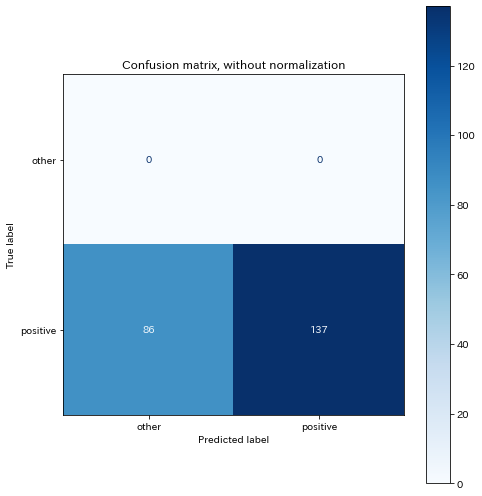

Normalized confusion matrix
[[0.         0.        ]
 [0.38565022 0.61434978]]


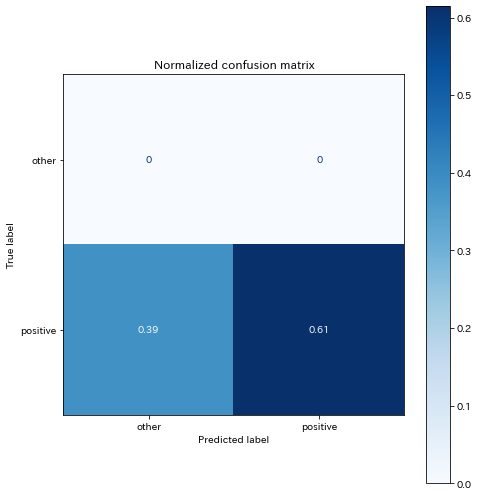

In [296]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["other", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [297]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)
X_train_time = data2_b_record_all_feature_80.iloc[0:444]
X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test_time = data2_b_record_all_feature_80.iloc[444:667]
y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)
predict_time = data2_b_record_all_feature_80.iloc[444:667]
predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 15:25:29,2020-11-11 15:25:33,other,0.0
1,2020-11-11 15:25:30,2020-11-11 15:25:34,other,0.0
2,2020-11-11 15:25:31,2020-11-11 15:25:35,other,0.0
3,2020-11-11 15:25:32,2020-11-11 15:25:36,positive,1.0
4,2020-11-11 15:25:33,2020-11-11 15:25:37,positive,1.0
...,...,...,...,...
218,2020-11-11 15:29:53,2020-11-11 15:29:57,positive,1.0
219,2020-11-11 15:29:54,2020-11-11 15:29:58,positive,1.0
220,2020-11-11 15:29:55,2020-11-11 15:29:59,positive,1.0
221,2020-11-11 15:29:56,2020-11-11 15:30:00,positive,1.0


In [298]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 15:25:29,2020-11-11 15:25:33,positive,1.0
1,2020-11-11 15:25:30,2020-11-11 15:25:34,positive,1.0
2,2020-11-11 15:25:31,2020-11-11 15:25:35,positive,1.0
3,2020-11-11 15:25:32,2020-11-11 15:25:36,positive,1.0
4,2020-11-11 15:25:33,2020-11-11 15:25:37,positive,1.0
...,...,...,...,...
218,2020-11-11 15:29:53,2020-11-11 15:29:57,positive,1.0
219,2020-11-11 15:29:54,2020-11-11 15:29:58,positive,1.0
220,2020-11-11 15:29:55,2020-11-11 15:29:59,positive,1.0
221,2020-11-11 15:29:56,2020-11-11 15:30:00,positive,1.0


In [299]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [300]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [301]:
test

,finish,emotion_level,label
start,,,
2020-11-11 15:15:30,2020-11-11 15:15:34,positive,1.0
2020-11-11 15:15:31,2020-11-11 15:15:35,positive,1.0
2020-11-11 15:15:32,2020-11-11 15:15:36,positive,1.0
2020-11-11 15:15:33,2020-11-11 15:15:37,positive,1.0
2020-11-11 15:15:34,2020-11-11 15:15:38,positive,1.0
...,...,...,...
2020-11-11 15:29:53,2020-11-11 15:29:57,positive,1.0
2020-11-11 15:29:54,2020-11-11 15:29:58,positive,1.0
2020-11-11 15:29:55,2020-11-11 15:29:59,positive,1.0


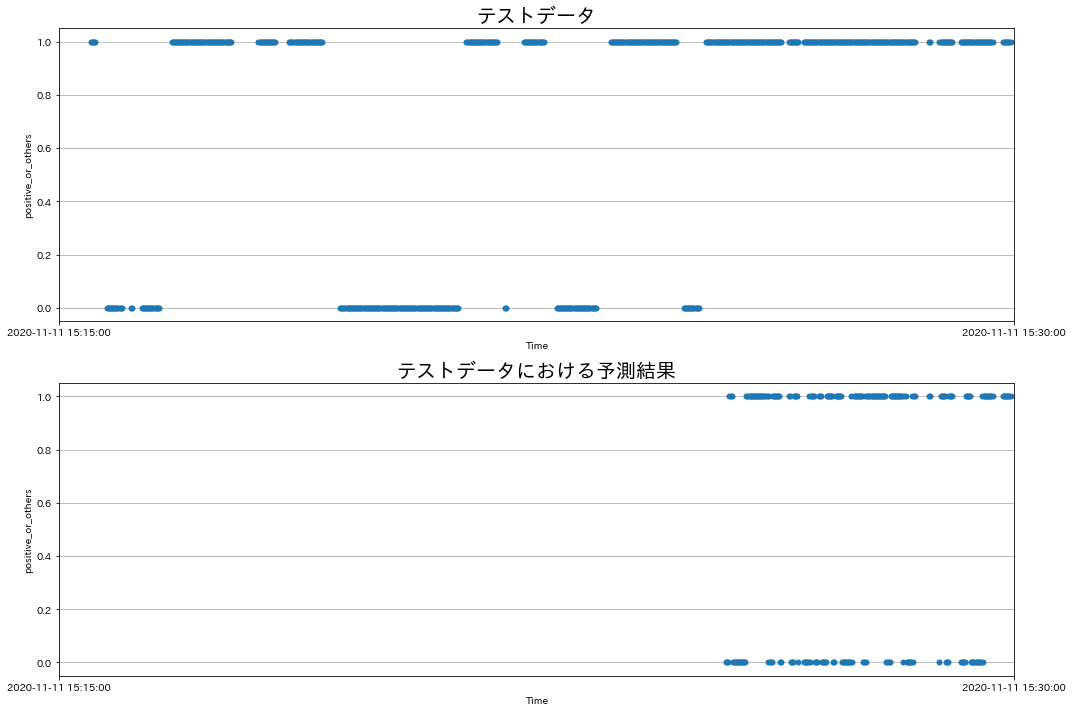

In [302]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
# ax1.set_ylim(0, 1)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)


plt.tight_layout()